# Pandas Challenges 3

Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)  

Just getting started? Read this guide: 10 minutes to pandas  

Data: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: 2013_movies.csv  

Challenge 1  

Plot domestic total gross over time. 

Challenge 2

Plot runtime vs. domestic total gross.

Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

Challenge 5

What director in your dataset has the highest gross per movie?

Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [159]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

## for OLS
import statsmodels.api as sm
import statsmodels.formula.api as smf

## for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns


In [160]:
os.chdir('/Users/bellepeng/Desktop/Metis/Work/Challenges')
! pwd

/Users/bellepeng/Desktop/Metis/Work/Challenges


In [161]:
df=pd.read_csv('/Users/bellepeng/Desktop/Metis/sf18_ds11/challenges/challenges_data/2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


**Challenge 1**  
Plot domestic total gross over time.

In [162]:
df['ReleaseDate']=pd.to_datetime(df['ReleaseDate'])
df['ReleaseDate'].describe()

count                     100
unique                     60
top       2013-12-25 00:00:00
freq                        5
first     2013-01-04 00:00:00
last      2013-12-27 00:00:00
Name: ReleaseDate, dtype: object

In [163]:
df['ReleaseDay']=[x.date() for x in df['ReleaseDate']]
df['ReleaseTime']=[x.time() for x in df['ReleaseDate']]
df['ReleaseDay'].describe()
df['ReleaseTime'].describe()
df['ReleaseDate']=[x.date() for x in df['ReleaseDate']]
df.drop(['ReleaseTime', 'ReleaseDay'], axis=1, inplace=True)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


In [164]:
df.set_index('ReleaseDate', inplace=True)
df.sort_index(inplace=True)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
ReleaseDate,,,,,,
2013-01-04,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92
2013-01-11,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80
2013-01-11,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113
2013-01-18,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100
2013-01-25,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88


Text(0,0.5,'Domestic Total Gross (in $1B)')

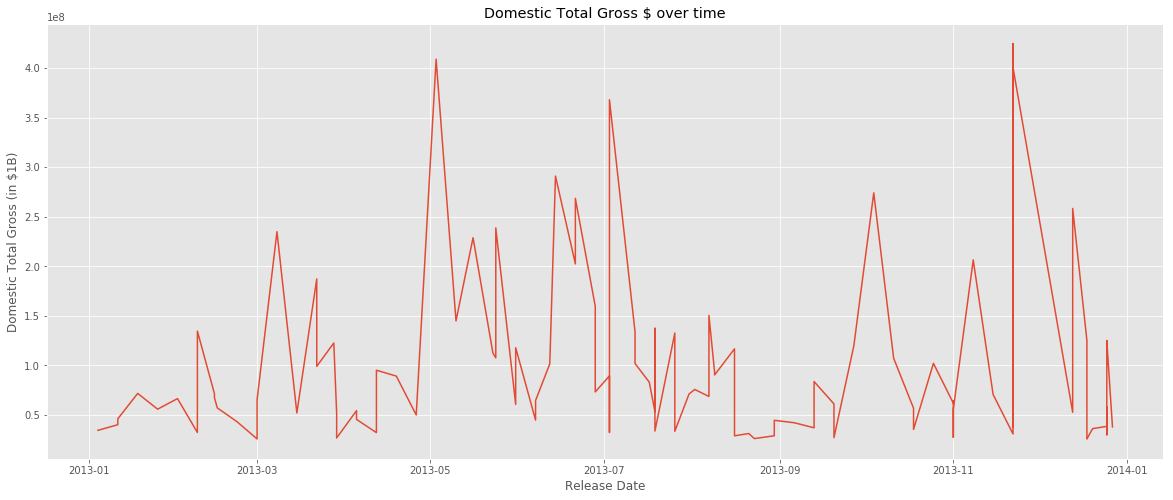

In [165]:
plt.figure(figsize=(20,8))
plt.plot(df['DomesticTotalGross'])
plt.title('Domestic Total Gross $ over time')
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross (in $1B)')

**Challenge 2**  
Plot runtime vs. domestic total gross.

Text(0,0.5,'Domestic Total Gross (in $1B)')

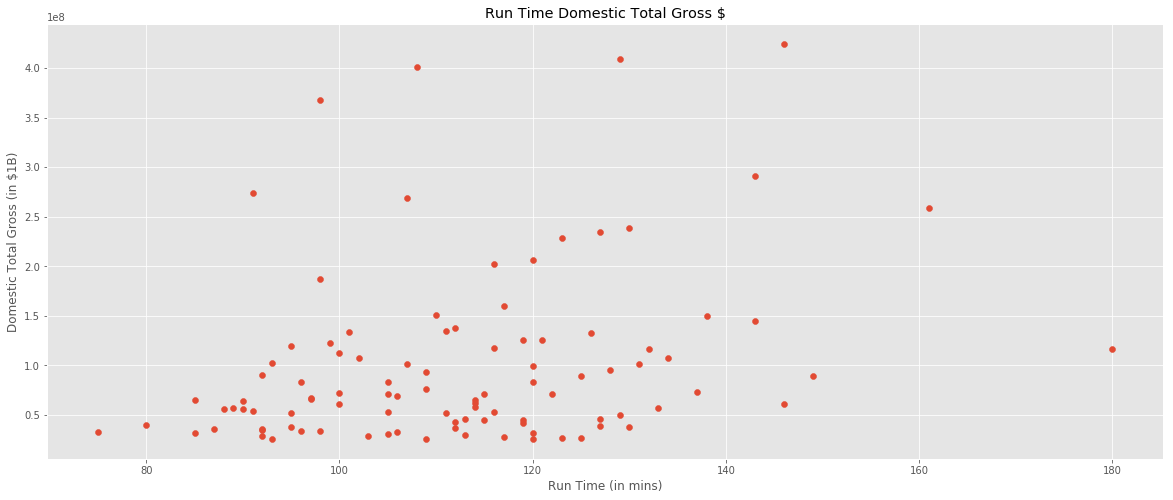

In [166]:
plt.figure(figsize=(20,8))
plt.scatter(x=df['Runtime'], y=df['DomesticTotalGross']);
plt.title('Run Time Domestic Total Gross $')
plt.xlabel('Run Time (in mins)')
plt.ylabel('Domestic Total Gross (in $1B)')

**Challenge 3**  
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [167]:
df.groupby('Rating')['Runtime', 'DomesticTotalGross'].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


**Challenge 4**  
Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [253]:
ax[1,0].get_xticklabels()

<a list of 7 Text xticklabel objects>

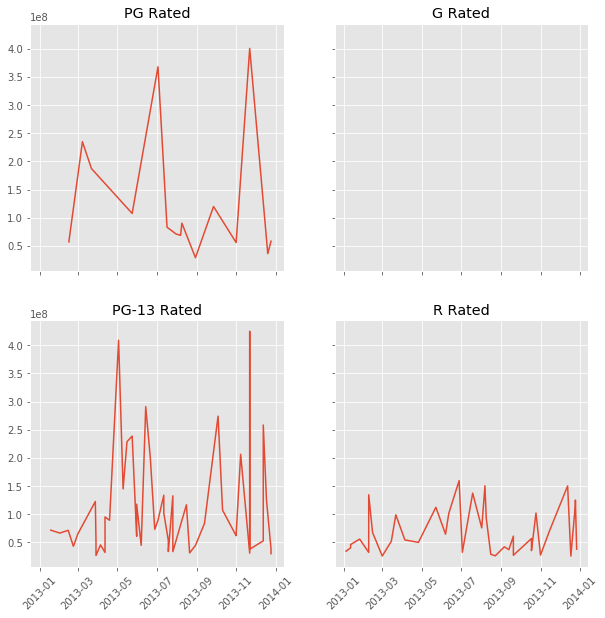

In [261]:
f, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,10))

# Set the ticks and ticklabels for all axes
ax[0,0].set_title('PG Rated')
ax[0,0].plot(df.loc[df['Rating']=='PG']['DomesticTotalGross'])
ax[0,1].set_title('G Rated')
ax[0,1].plot(df.loc[df['Rating']=='G']['DomesticTotalGross'])
ax[1,0].set_title('PG-13 Rated')
ax[1,0].plot(df.loc[df['Rating']=='PG-13']['DomesticTotalGross'])
ax[1,1].set_title('R Rated')
ax[1,1].plot(df.loc[df['Rating']=='R']['DomesticTotalGross'])
plt.xticks(fontsize=10, rotation=45)
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(45)


**Challenge 5**  
What director in your dataset has the highest gross per movie?  
Francis Lawrence for "The Hunger Games: Catching Fire" at $424,668,047.

In [171]:
df.sort_values(by=['DomesticTotalGross'], ascending=False).head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
ReleaseDate,,,,,,
2013-11-22,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146
2013-05-03,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129
2013-11-22,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108


In [172]:
df.groupby(by='Director').mean().sort_values(by='DomesticTotalGross', ascending=False).head(3)

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000.0,424668047.0,146.0
Shane Black,200000000.0,409013994.0,129.0
Chris BuckJennifer Lee,150000000.0,400738009.0,108.0


**Challenge 6**  
Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.
Title of graph should include: Mean Domestic Total Gross by Month in 2013
Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [229]:
df.index = [x.date() for x in df.index]
df.index = pd.to_datetime(df.index)

In [230]:
monthly=pd.DataFrame(df['DomesticTotalGross'].resample('M').apply([np.mean, np.std]))
monthly.head()

,mean,std
2013-01-31,4.954324e+07,1.465947e+07
2013-02-28,6.738601e+07,3.283185e+07
2013-03-31,9.609710e+07,7.323942e+07
2013-04-30,6.094072e+07,2.530104e+07
2013-05-31,1.774097e+08,1.117754e+08


Text(0.5,1,'Mean Domestic Total Gross by Month in 2013')

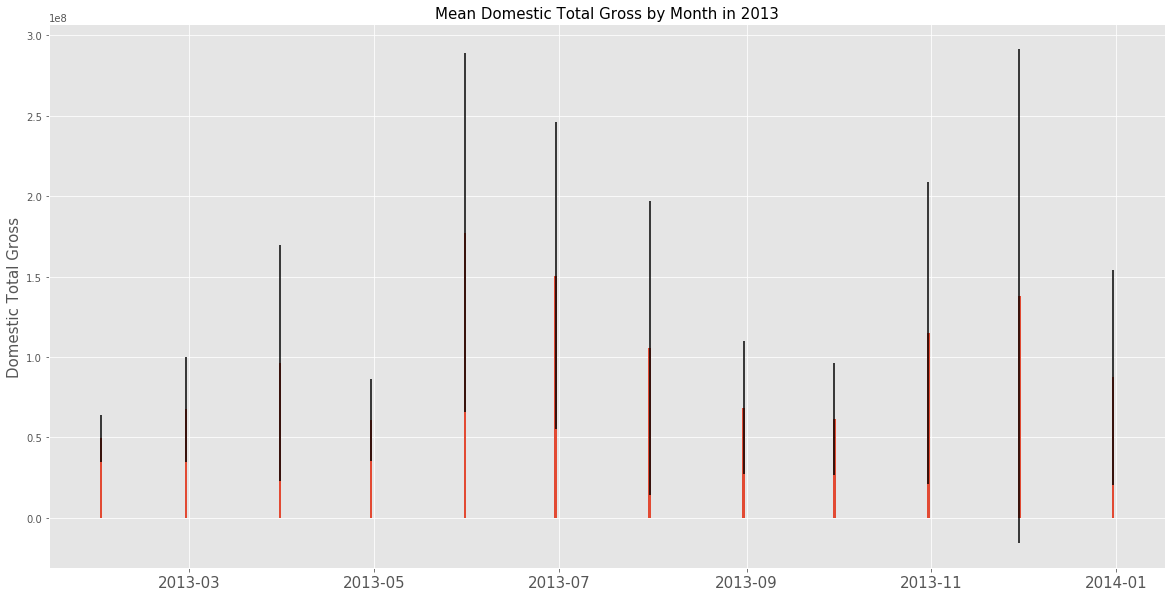

In [231]:
plt.figure(figsize=(20,10))
plt.bar(monthly.index, monthly['mean'], yerr=monthly['std'])
plt.ylabel('Domestic Total Gross', size=15)
plt.xticks(fontsize=15, rotation=0)
plt.title('Mean Domestic Total Gross by Month in 2013', size=15)

In [234]:
monthly.index = [x.date() for x in monthly.index]

Text(0.5,1,'Mean Domestic Total Gross by Month in 2013')

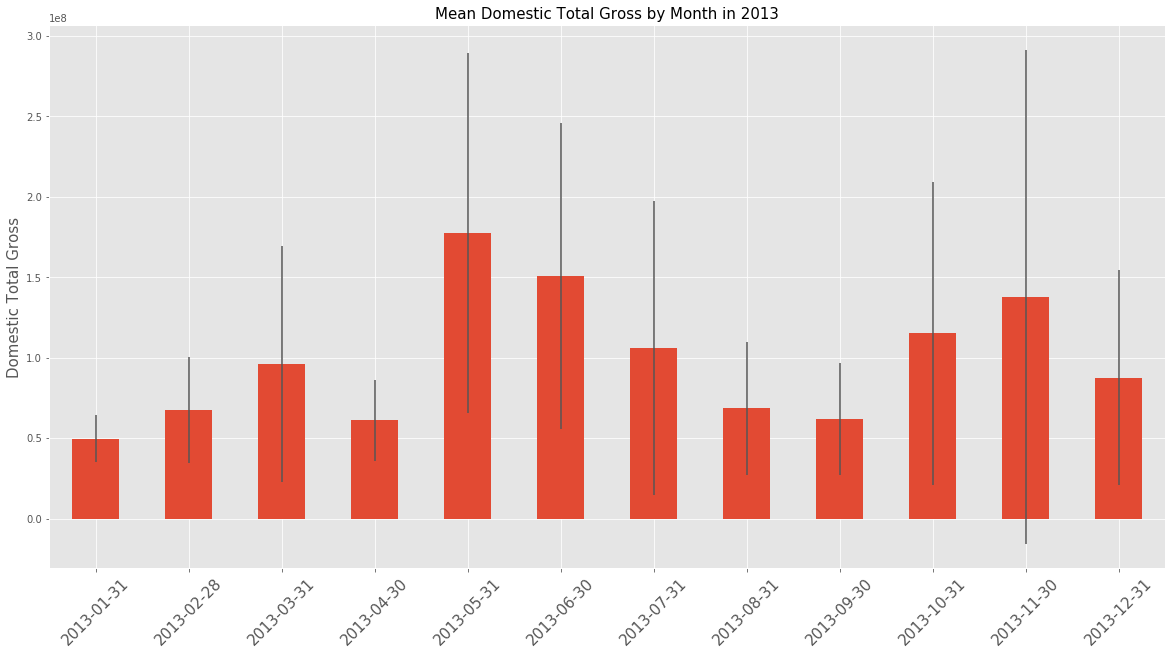

In [235]:
plt.figure(figsize=(20,10))
monthly['mean'].plot(kind='bar', yerr=monthly['std']);
plt.ylabel('Domestic Total Gross', size=15)
plt.xticks(fontsize=15, rotation=45)
plt.title('Mean Domestic Total Gross by Month in 2013', size=15)